In [47]:
#Importing packages
#Model
from sklearn.ensemble import RandomForestClassifier
#Sklearn
from sklearn import model_selection, linear_model
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,RepeatedStratifiedKFold,cross_validate
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,auc,roc_auc_score,roc_curve,classification_report

In [48]:
#Others
import random
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import math
import os
import warnings
import optuna
import joblib

In [49]:
#Setting the Work Path
warnings.filterwarnings ('ignore')
#Work Path
os.chdir("C:/Users/A/Desktop/Paper_0_Hydrogel")

In [50]:
def Model_results(Model_clf,X_test,y,Cv_model):
    Model_scores= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=True)
    Model_score= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=False)
#Accuracy
    Model_Accuracy_test_mean=Model_scores['test_accuracy'].mean()
    Model_Accuracy_test_se=(Model_scores['test_accuracy'].std()/math.sqrt(len(Model_scores['test_accuracy']))) 
    Model_Accuracy_train_mean=Model_scores['train_accuracy'].mean()
    Model_Accuracy_train_se=(Model_scores['train_accuracy'].std()/math.sqrt(len(Model_scores['train_accuracy']))) 
#f1
    Model_f1_mean=Model_score['test_f1'].mean()
    Model_f1_se=(Model_score['test_f1'].std()/math.sqrt(len(Model_score['test_f1']))) 
#precision
    Model_precision_mean=Model_score['test_precision'].mean()
    Model_precision_se=(Model_score['test_precision'].std()/math.sqrt(len(Model_score['test_precision']))) 
#recall
    Model_recall_mean=Model_score['test_recall'].mean()
    Model_recall_se=(Model_score['test_recall'].std()/math.sqrt(len(Model_score['test_recall']))) 
#roc_auc
    Model_roc_auc_mean=Model_score['test_roc_auc'].mean()
    Model_roc_auc_se=(Model_score['test_roc_auc'].std()/math.sqrt(len(Model_score['test_roc_auc']))) 
    Model = {'Mean':[Model_Accuracy_test_mean,Model_Accuracy_train_mean,Model_f1_mean,Model_precision_mean,Model_recall_mean,Model_roc_auc_mean],
        'Se':[Model_Accuracy_test_se,Model_Accuracy_train_se,Model_f1_se,Model_precision_se,Model_recall_se,Model_roc_auc_se]}
    Model = pd.DataFrame(Model, index=['Accuracy_test','Accuracy_train','F1 Score','Precision','Recall','Roc_auc']) # 这里设定了 index 个数要和列表长度一致
    return Model

In [51]:
Cv_optuna= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_model= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_RFECV= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)


In [52]:
#Reading the data
ML_data= pd.read_csv("./Original data/ML_data.csv",header=0,index_col=0)
X_NAomit_data= pd.read_csv("./Original data/X_NAomit_data.csv",header=0,index_col=0)
Raw_data = pd.read_csv('./Original data/raw_data.csv',index_col=0)
Raw_data['Gelability']=np.where(Raw_data['Gelability']=='Gelable', 1, 0)
#original data(descriptors= 4175）
print(X_NAomit_data.shape)
X_NAomit_data.head()

(71, 4175)


,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,267.28,8.352500,20.0734,33.3526,19.8921,36.9899,0.627294,1.042269,0.621628,1.155934,...,0.0,0.0,0.0,10.0,16.0,0.842105,7.75,0.407895,17.966397,8.618182
Ma_2019_U,244.23,8.421724,17.9656,30.5854,17.5454,33.3290,0.619503,1.054669,0.605014,1.149276,...,0.0,0.0,0.0,0.0,14.0,0.823529,6.75,0.397059,14.808251,7.026700
Ma_2019_C,243.25,8.108333,18.2722,31.3599,18.0966,34.6179,0.609073,1.045330,0.603220,1.153930,...,0.0,0.0,0.0,0.0,14.0,0.823529,6.75,0.397059,14.808251,7.026700
Ma_2019_G,283.28,8.584242,20.7882,34.6799,20.3466,38.1993,0.629945,1.050906,0.616564,1.157555,...,0.0,0.0,0.0,5.0,17.0,0.850000,8.75,0.437500,19.586399,10.257197
Ma_2019_dA,251.28,8.105806,19.3586,32.0253,19.4376,35.7805,0.624471,1.033074,0.627019,1.154210,...,0.0,0.0,0.0,10.0,15.0,0.833333,7.00,0.388889,17.259745,8.115820


In [53]:
#Data after feature selection (descriptors= 64）
print(ML_data.shape)
ML_data.head()

(71, 40)


,MATS3p,SM10_AEA(dm),GATS7s,F07[N-O],VE1sign_Dz(v),VE3sign_D/Dt,P_VSA_charge_4,CATS2D_09_DA,B09[O-O],CATS2D_06_DL,...,MATS2m,MATS2p,GATS6i,P_VSA_charge_2,Eig03_AEA(ed),CATS2D_05_DA,GATS2p,C-016,s2_pathLength,GATS8i
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,0.223067,0.382490,0.390779,0.500000,0.339202,0.433674,0.000000,0.4,0.0,0.00,...,0.136148,0.791478,0.070041,0.015761,0.580423,0.500000,0.304895,0.0,0.090909,0.586479
Ma_2019_U,0.218409,0.270850,0.589845,0.000000,0.097243,0.770077,0.000000,0.2,1.0,0.25,...,0.028067,0.316380,0.138782,0.384100,0.200950,0.500000,0.711020,1.0,0.090909,0.000000
Ma_2019_C,0.189242,0.270850,0.462449,0.166667,0.081578,0.770077,0.359389,0.2,0.0,0.25,...,0.157809,0.441757,0.327739,0.025930,0.200950,0.500000,0.667729,1.0,0.090909,0.485155
Ma_2019_G,0.307924,0.390516,0.365302,0.500000,0.259153,0.508232,0.359389,0.6,1.0,0.00,...,0.224020,0.631157,0.262950,0.373931,0.587700,0.666667,0.484050,0.0,0.090909,0.607829
Ma_2019_dA,0.277926,0.290988,0.582334,0.166667,0.404032,0.457316,0.000000,0.4,0.0,0.25,...,0.230461,0.794139,0.231586,0.015761,0.536421,0.000000,0.242784,0.0,0.151515,0.658417


In [54]:
#Data pre-processing of models
X_test_NAomit=np.array(X_NAomit_data)
X_test_ML=np.array(ML_data)
y=Raw_data['Gelability'].values
clf=RandomForestClassifier(random_state=0)

In [55]:
#Model1 （4175 descriptors）
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X_test_NAomit,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.625143,0.014336
Accuracy_train,0.978164,0.001539
F1 Score,0.653154,0.015627
Precision,0.652747,0.015257
Recall,0.684643,0.024731
Roc_auc,0.722691,0.017949


In [56]:
#Model2 （40 descriptors）
Model2_clf=clf
Model2_clf.fit(X_test_ML, y)
#Model2
Model2=Model_results(Model2_clf,X_test_ML,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.668667,0.013993
Accuracy_train,0.978164,0.001539
F1 Score,0.704167,0.012996
Precision,0.681876,0.014414
Recall,0.750357,0.021222
Roc_auc,0.751267,0.016059


In [57]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators",100,1000,1) 
    max_depth = trial.suggest_int("max_depth",5,20,1)
    max_features = trial.suggest_int("max_features",5,30,1)
    #max_features = trial.suggest_categorical("max_features",["log2","sqrt","auto"])
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease",0,5,log=False) 
    model = RandomForestClassifier(n_estimators = n_estimators
              ,max_depth = max_depth
              ,max_features = max_features
              ,min_impurity_decrease = min_impurity_decrease
              ,random_state=0
              ,verbose=False
              ,n_jobs=8)

# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X_test_ML, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)

[I 2023-01-14 16:50:53,997] A new study created in memory with name: no-name-521d509a-591b-4dd9-9f97-4bd7da784bf9
[I 2023-01-14 16:50:58,721] Trial 0 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 594, 'max_depth': 16, 'max_features': 20, 'min_impurity_decrease': 2.724415914984484}. Best is trial 0 with value: 0.5352380952380952.
[I 2023-01-14 16:51:01,188] Trial 1 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 481, 'max_depth': 15, 'max_features': 16, 'min_impurity_decrease': 4.4588650039103985}. Best is trial 0 with value: 0.5352380952380952.
[I 2023-01-14 16:51:05,877] Trial 2 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 968, 'max_depth': 11, 'max_features': 25, 'min_impurity_decrease': 2.644474598764522}. Best is trial 0 with value: 0.5352380952380952.
[I 2023-01-14 16:51:08,807] Trial 3 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 611, 'max_depth': 19, 'max_features': 6, 'mi

In [58]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=RandomForestClassifier(n_estimators = study.best_params['n_estimators']
              ,max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              ,min_impurity_decrease = study.best_params['min_impurity_decrease']
              ,random_state=0
              ,verbose=False
              ,n_jobs=8)

The best parameters are : 
{'n_estimators': 942, 'max_depth': 5, 'max_features': 23, 'min_impurity_decrease': 0.003301072152590219}


In [59]:
#Model3
Model3=Model_results(clf,X_test_ML,y,Cv_model)
Model3

,Mean,Se
Accuracy_test,0.671714,0.013310
Accuracy_train,0.978164,0.001539
F1 Score,0.706308,0.013124
Precision,0.689618,0.014764
Recall,0.754286,0.021675
Roc_auc,0.737313,0.016333


In [60]:
#Recursive feature elimination
min_features_to_select =5
rfecv = RFECV(estimator=clf,step=1,cv=Cv_RFECV,scoring="accuracy",min_features_to_select=min_features_to_select,n_jobs=8)
rfecv.fit(X_test_ML,y)
columns=Series(ML_data.columns.tolist())[rfecv.support_.tolist()].tolist()

In [69]:
data_rf=ML_data[columns]
data_rf.to_csv("./Results/data_rf.csv",sep=',')
X_RF=np.array(data_rf)

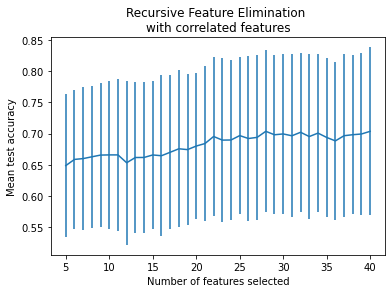

In [62]:
import matplotlib.pyplot as plt
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [63]:
#Model4 （len(columns) descriptors）
Model4_clf=clf=RandomForestClassifier(n_estimators = study.best_params['n_estimators']
              ,max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              ,min_impurity_decrease = study.best_params['min_impurity_decrease']
              ,random_state=0
              ,verbose=False
              ,n_jobs=8)
Model4_clf.fit(X_RF, y)
#Model4
Model4=Model_results(Model4_clf,X_RF,y,Cv_model)
Model4


,Mean,Se
Accuracy_test,0.674476,0.013052
Accuracy_train,0.978164,0.001539
F1 Score,0.707687,0.012173
Precision,0.691728,0.014907
Recall,0.751071,0.021053
Roc_auc,0.745434,0.015293


In [64]:
Model4_clf=Model4_clf.fit(X_RF, y)
#Saving the final model
joblib.dump(Model4_clf, './Models/RF.pkl')
RF= joblib.load(filename='./Models/RF.pkl')

In [65]:
# Prediction of gelability
X_test_dataframe=pd.read_csv("./Original data/X_test_data.csv",sep=',',index_col=0)
X_test_last=X_test_dataframe[data_rf.columns.to_list()]
X_test=np.array(X_test_last)
X_test_last.head()

,MATS3p,SM10_AEA(dm),GATS7s,F07[N-O],VE1sign_Dz(v),VE3sign_D/Dt,B09[O-O],CATS2D_06_DL,SpMAD_EA(ri),P_VSA_charge_7,...,P_VSA_LogP_4,Mv,IC1,MATS2m,MATS2p,GATS6i,P_VSA_charge_2,CATS2D_05_DA,GATS2p,GATS8i
cid,,,,,,,,,,,,,,,,,,,,,
5273,0.148099,0.279629,0.937287,-0.166667,0.401550,0.672502,0.0,0.25,0.473899,0.055154,...,0.294068,0.534972,0.543397,0.369317,0.839555,-0.520914,0.139311,-0.166667,0.120946,-0.234805
13463,0.167609,0.382490,0.371194,0.166667,0.297744,0.433674,0.0,0.00,0.351799,0.000000,...,0.415638,0.843058,0.720324,-0.145355,0.534014,0.173585,0.015761,0.166667,0.224814,0.557069
39148,0.082452,0.442684,0.247689,0.500000,0.278206,0.618221,0.0,0.00,0.607535,0.365425,...,0.415638,0.386171,0.627672,0.490001,1.437855,-0.901637,0.015761,0.500000,-0.226505,0.231925
56328,0.345941,0.338437,0.498540,0.166667,0.422186,0.448300,0.0,0.00,0.439683,0.000000,...,0.415638,0.689307,0.768553,0.185979,0.786846,0.422220,0.015761,0.000000,0.189035,0.464901
67358,0.202511,0.471826,0.577994,0.500000,0.354301,0.414307,0.0,0.00,0.630331,0.000000,...,0.322354,0.650332,0.768763,0.151812,0.729538,0.090504,0.000000,0.500000,0.423568,0.469174


In [66]:
Predicted_data=pd.DataFrame(RF.predict_proba(X_test),columns=['Probability of not gelable','Probability of gelable'])

Predicted_data

,Probability of not gelable,Probability of gelable
0,0.502533,0.497467
1,0.304320,0.695680
2,0.572324,0.427676
3,0.313603,0.686397
4,0.427291,0.572709
...,...,...
7252,0.354313,0.645687
7253,0.342063,0.657937
7254,0.396151,0.603849
7255,0.462044,0.537956


In [67]:
#Predicted results
Predicted_data=pd.DataFrame(RF.predict_proba(X_test),columns=['Probability of not gelable','Probability of gelable'])
Predicted_data.index=X_test_last.index
Predicted_data.sort_values(by="Probability of gelable" , inplace=True, ascending=False)
Predicted_data.to_csv("./Results/RF_predict_data.csv",sep=',')
Predicted_data.head()

,Probability of not gelable,Probability of gelable
cid,,
150667,0.078119,0.921881
136623055,0.079624,0.920376
135596570,0.079624,0.920376
135514572,0.080685,0.919315
135508725,0.080685,0.919315


In [68]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2,Model3,Model4],axis=1)
Model_data.to_csv("./Results/RF_model_data.csv",sep=',')
Model_data.columns = [['RandomForest']*8,['Model 1','Model 1', 'Model 2','Model 2', 'Model 3', 'Model 3', 'Model 4', 'Model 4'], ['Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv('./Results/RF_model_data.csv',encoding='utf-8')
#Read data：pd.read_csv('./Results/RF_model_data.csv',encoding='utf-8',header=[0,1,2])
Model_data

Method         RandomForest                                                    \
Model               Model 1             Model 2             Model 3             
Values                 Mean        Se      Mean        Se      Mean        Se   
Accuracy_test      0.625143  0.014336  0.668667  0.013993  0.671714  0.013310   
Accuracy_train     0.978164  0.001539  0.978164  0.001539  0.978164  0.001539   
F1 Score           0.653154  0.015627  0.704167  0.012996  0.706308  0.013124   
Precision          0.652747  0.015257  0.681876  0.014414  0.689618  0.014764   
Recall             0.684643  0.024731  0.750357  0.021222  0.754286  0.021675   
Roc_auc            0.722691  0.017949  0.751267  0.016059  0.737313  0.016333   

Method                              
Model            Model 4            
Values              Mean        Se  
Accuracy_test   0.674476  0.013052  
Accuracy_train  0.978164  0.001539  
F1 Score        0.707687  0.012173  
Precision       0.691728  0.014907  
Recall          0.751071  0.021053  
Roc_auc         0.745434  0.015293

In [ ]:
#Feature Importance
RF= joblib.load(filename='./Models/RF.pkl')
result = permutation_importance(
    RF, X_RF, y, n_repeats=1000, random_state=0, n_jobs=2)
clf2_importances = pd.Series(result.importances_mean, index= columns)
importances_mean=pd.DataFrame(clf2_importances, index=columns)
importances_std=pd.DataFrame(result.importances_std, index=columns)
importances_se=pd.DataFrame(result.importances_std/math.sqrt(10), index=columns)
importances_=pd.concat([importances_mean,importances_std,importances_se],axis=1)
importances_.columns=["mean","std","se"]
Feature_importance=importances_.sort_values(by="mean",ascending=True)
Feature_importance.columns=[['RandomForest']*3,["mean","std","se"]]
Feature_importance.columns.names=['Method','Values']
Feature_importance.to_csv('./Results/RF_feature_importance.csv',encoding='utf-8')
Feature_importance